# Crime in US

As we live in a society constantly exposed to violence from several sources of information, social media has played a crucial role in not only sharing violent situations instantaneously, but also in providing more data to get a better understanding of when, how and why those complex problems occured in the past. In US, for instance, incidents involving guns have rapidly increased over the last 5 years. However, we barely know some of the social factors that contribute to this interesting numbers and we now have the possibility to dig further into these conditions and have a fresh perspective that may explain some unhiden patterns that may lead to interesting steps in preventing them to happen so often. 

# Hypothesis

1. Main factors why violence occurs in US (rel)
2. Males participate more in violent incidents in comparisson with Women.
3. Incidents where the perpetrator knows the victim are more deadly than those in which is unknown.
4. Southern states (near Mexico) present higher levels of violence 
4. Gun permission vs deaths

Pittsburgh
1. Income vs Crime (rel)
3. Education vs Crime (pending)


Intento 2- espero sirva

# Why are we focusing on these questions?
Describe the questions you and your group found interesting, and what motivated you to answer them 

#### 1. Main factors why violence occurs in US (rel)


#### 2. Males participate more in violent incidents in comparison with Women.
Research has shown that when it comes to violent crimes, Male could act more aggresive than Women. While this can be explained  because of the impact of environmental and biological traits on each gender, there is no doubt that men present higher levels of  physical violence and verbal abuse than women. In fact, women show an indirect aggresive behavior such as hurt other's reputation by spreading rumors or damage their social standing. Therefore, we would like to know if this aggression is also presented in the gun violence in the US. We consider it an intriguing topic which we could hopefully answer in the data.

#### 3. Incidents where the perpetrator 'knows' the victim are more deadly than those in which is 'unknown', like robberies.
This statement came to this list after exploring some data and realizing that not only mass shootings or robbery occur in the US, but also sentimental tragedies in close relationships. Due to the fact that these unfortunate events happen frequently, we suggest that those moments in which the suspect knows the victim(s) and perpetrate crimes result in lethal results in contrast with those in which there is only a robbery.

#### 4. Southern states (near Mexico) present higher deaths than other locations  in US
Drug issues in states near the border from Mexico is a familiar problem where even the current administration in USA has established several approaches to effectively limit this consumption with no successful results. Therefore, we think that there might be a possible correlation between the number of deaths and the location.

## Why Pittsburgh?
It turns out that Pennsylvania is one of the states with an important decrease in the number of violent incidents per year. There must be some social, economical and even educational factors that have contributed to reach those indicators. Along with information we found about Pittsburg, a city within Pennsylvania, we think that we can explain the reason why this has happened.

#### 1. Income vs Crime (rel)
#### 2. Education vs Crime (pending)

In [ ]:
Lau: 

In [ ]:
Paolo: This is  my text contrinution ... here I will explain Pittsburgh

In [ ]:
Mike: 

# Datasources
Summarize where and how you found the data you used to answer these questions 

### 1. Gun Data (csv)
"Gun Violence Archive (GVA) is a not for profit corporation formed in 2013 to provide free online public access to accurate information about gun-related violence in the United States. GVA will collect and check for accuracy, comprehensive information about gun-related violence in the U.S. and then post and disseminate it online." - Kaggle

In [ ]:
Lau: PRUEBA CON PAOLO

In [ ]:
Paolo:

In [ ]:
Mike: 

# Cleanup process

#### 1. Gun Data (csv)
##### Challenges:
    1. Large datafile (> 200K rows)
    2. Memory consumption
    3. Web scrapping files (fields with || or :: patterns)
    4. Information with missing values
    5. Save/Load pickle files (optimize data loading)

##### Approach:
    1. Chunk size to optimize loading requests in large csv file to avoid memory consumption errors.
    2. Manipulate each set of data according to some patterns for each column to build independent dataframes (python definition).
    3. Process and store cleaned dataframes in pickle objects.
    4. Load stored dataframes to facilitate their processing.

In [4]:
# Import dependencies
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import stats
from functions import splitColumnsDF
from functions import readWholeDataset

In [ ]:
Lau: Data cleaning ---Miguel Rojas

In [5]:
# ================ Import Data gun file  ========================
urlGunViolence = "../gun-violence-data_01-2013_03-2018.csv"
# Read whole dataset
#readWholeDataset(urlGunViolence)

# ================= Loading cleaned data  ===================== 
try:
    print("Loading files")
    gunViolenceDf = pd.read_pickle("Resources/gunViolence.pkl")
    print("Loading gunViolenceDf")
    gunStolenDF = pd.read_pickle("Resources/gunStolen.pkl")
    print("Loading gunStolenDF")
    gunTypeDF = pd.read_pickle("Resources/gunType.pkl")
    print("Loading gunTypeDF")
    ageDF = pd.read_pickle("Resources/age.pkl")
    print("Loading ageDF")
    ageGroupDF = pd.read_pickle("Resources/ageGroup.pkl")
    print("Loading ageGroupDF")
    genderDF = pd.read_pickle("Resources/gender.pkl")
    print("Loading genderDF")
    relationshipDF = pd.read_pickle("Resources/relationship.pkl")
    print("Loading relationshipDF")
    statusDF = pd.read_pickle("Resources/status.pkl")
    print("Loading statusDF")
    typeDF = pd.read_pickle("Resources/type.pkl")
    print("Loading typeDF")
except Exception:
    print("No pickle files found")

Loading files
Loading gunViolenceDf
Loading gunStolenDF
Loading gunTypeDF
Loading ageDF
Loading ageGroupDF
Loading genderDF
Loading relationshipDF
Loading statusDF
Loading typeDF


In [ ]:
Mike:

# Data Exploration

1. Incidents per year [2014-2017]
2. Top 10
3. Bottom 10
4. 

In [ ]:
Lau:

### 1. What are the most common type of violent incidents in the US?

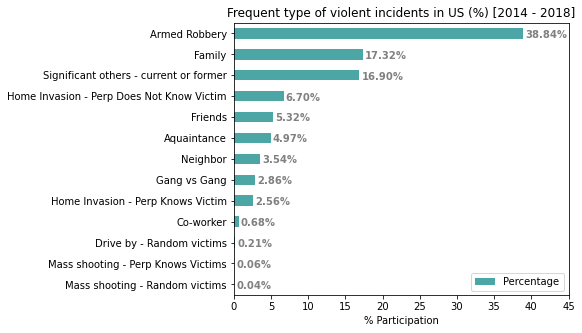

In [6]:
# Filter years 2014 - 2018
rel = relationshipDF.loc[(relationshipDF["year"] > 2013) & (relationshipDF["year"] < 2019)]
rel = rel.loc[:,["Value","Total"]].groupby(by="Value").sum()
relMax = rel["Total"].sum()
# Calculate the percentage out of the total
rel["Percentage"] = (rel["Total"]/relMax)*100
# Remove unused column
rel.drop(columns="Total", inplace=True)
# Descending order for plottling
rel = rel.sort_values(by="Percentage", ascending=True)

# Plot
ax = rel.plot(kind="barh",align="center", color="teal", alpha=0.7, figsize=(6,5))
plt.title(f"Frequent type of violent incidents in US (%) [2014 - 2018]")
plt.ylabel("")
plt.xlabel("% Participation")
plt.xlim(0,45)
ax.get_legend().set_bbox_to_anchor((1, 0.1))

#Add data labels to graph
for i, value in enumerate(rel["Percentage"]):
    ax.text(value + 0.3, i - 0.2, str("{:,.2f}%".format(value)), color='grey', fontweight='bold')
    
plt.show()

Interestingly, this graph shows that in just four years (2014 - 2018), Armed Robbery has been the most frequent violent incident that occurs in the US. 39% indicates that people commonly face this kind of violence as perpetrators threating victims with a handgun. However, family-related issues (17%) and couple relationship (17%) are also another kind of violent incidents.

### 2. Which is the typical guntype involved in those incidents?

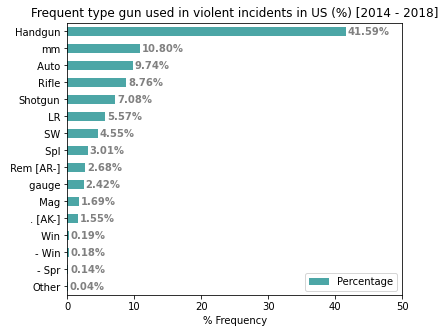

In [7]:
# Filter years 2014 - 2018
gun = gunTypeDF.loc[(gunTypeDF["year"] > 2013) & (gunTypeDF["year"] < 2019) & (gunTypeDF["Value"] != "Unknown")]
gun = gun.groupby(by=["Value"], as_index=False).aggregate({"incident_id":"count",
                                                          "Total":"sum",
                                                          "n_killed":"max",
                                                          "n_injured":"max"})
gunTotal = gun["Total"].sum()
gun["Percentage"] = (gun["Total"]/gunTotal)*100
gun = gun.sort_values(by="Percentage",ascending=True)
gun = gun.loc[:,["Value","Percentage"]]
gun.set_index("Value",inplace=True)


# Plot
ax = gun.plot(kind="barh",align="center", color="teal", alpha=0.7, figsize=(6,5))
plt.title(f"Frequent type gun used in violent incidents in US (%) [2014 - 2018]")
plt.ylabel("")
plt.xlabel("% Frequency")
plt.xlim(0,50)
ax.get_legend().set_bbox_to_anchor((1, 0.1))

#Add data labels to graph
for i, value in enumerate(gun["Percentage"]):
    ax.text(value + 0.3, i - 0.2, str("{:,.2f}%".format(value)), color='grey', fontweight='bold')
    
plt.show()



+ Although there are many 'Unknown' in this dataset, we did not include it as part of this analysis.

Unsurprisingly, a handgun is the first choice for perpetrators to commit a violent act. Over 41% prefers a small gun, presumably, because its usability, portability and permission to use in the US. 

In [ ]:
Mike:

# Data Analysis
Describe the analysis process (accompanied by your Jupyter Notebook) 

1. Correlations & distribution graphs

In [ ]:
Lau:

### 3. Incidents where the perpetrator 'knows' the victim are more deadly than those in which is 'unknown', like robberies.

===================== Family ========================
 The r values is: 0.56
 The equation is: 0.77x + 0.77


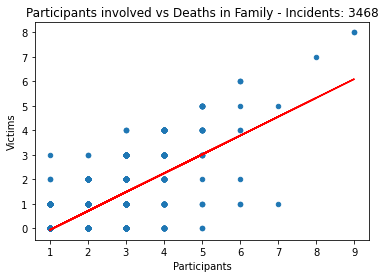

===================== Significant others - current or former ========================
 The r values is: 0.32
 The equation is: 0.45x + 0.45


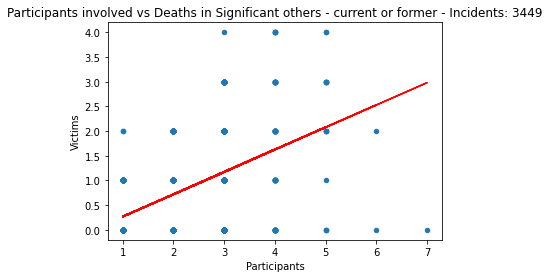

===================== Armed Robbery ========================
 The r values is: 0.2
 The equation is: 0.08x + 0.08


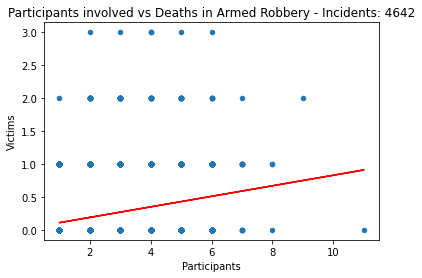

In [8]:
# Unique values of the type of relationship in the dataset
values = ["Family","Significant others - current or former", "Armed Robbery"]
participants = genderDF.groupby(by="incident_id", as_index=False).aggregate({"Total":"sum",
                                                                            "n_killed":"max",
                                                                            "n_injured":"max"})

participants = participants.loc[:,["incident_id","Total","n_killed","n_injured"]]

family_data = []
significant_other_data = []
robbery_data = []

# Graph deaths and injured for each kind of relationships involved in the incidents
for val in values:
    
    print(f"===================== {val} ========================")
    
    
    
    # Get the information from relationship in each incident and rename the Total column
    rel = relationshipDF.rename(columns={"Total":"Rel"})    
    # Filter a single type of relationship and get the appropiate final numbers per column
    rel = rel.loc[(rel["Value"] == val)
                 & (rel["year"] > 2013) & (rel["year"] < 2019),
                 ].groupby(by="incident_id", as_index=False).aggregate({"Rel":"sum","n_killed":"max","n_injured":"max"})
    
    # Merge relationship with participants
    merge_df = rel.merge(participants.loc[:,["incident_id","Total"]], how="inner", on="incident_id")
    #merge_df["n_total"] = merge_df["n_injured"] + merge_df["n_killed"]
    
    # Linear Regression Model
    x_values = merge_df["Total"]
    y_values = merge_df["n_killed"]
    y_lr_values = []
    n = len(x_values)
    # Calculate the regression model
    slope, intercept, rvalue, pvalue, stderr = linregress(x = x_values, y = y_values)

    # Calculate the y = Mx + b values
    for lat in x_values:
        y_lr_values.append(round((slope * lat + intercept),2))

    print(f" The r values is: {round(rvalue,2)}")
    print(f" The equation is: {round(slope,2)}x + {round(slope,2)}")
    
    if(val == "Family"):
        family_data = y_values
    elif (val == "Armed Robbery"):
        robbery_data = y_values
    else:
        significant_other_data = y_values
    
    
    # Plots
    ax = merge_df.plot(x = "Total",y = "n_killed", kind="scatter")
    plt.title(f"Participants involved vs Deaths in {val} - Incidents: {n}")
    plt.xlabel("Participants")
    plt.ylabel("Victims")
    plt.plot(x_values, y_lr_values, color="red")
    plt.show()


Considering the three most frecuent types of violent incidents in the US, it turns out that family-related issues such as direct Family relationships and significat others are, in fact, more deadlier in comparisson with the armed robbery scenario.
According to our data, the number of people involved in those incidents has a positive correlation with the number of deaths may occur. This sounds a little obvious, but if we look carefully at the graphs and compare the results, a family issue involving 9 people resulted with 8 out of 9 killed (88% of losses), whereas in a robbery involving the same amout of people, only 2 were killed (25% of losses). In other words, although the armed robbery is more common in US, conflicts within a family may lead to fatal endings.

### 4. Southern states (near Mexico) present higher deaths than other locations  in US

 The r values is: 0.04
 The equation is: 0.01x + 0.01


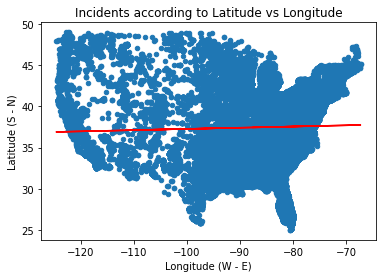

In [9]:
#display(gunViolenceDf.loc[gunViolenceDf["n_killed"] > 35])

location = gunViolenceDf.loc[(gunViolenceDf["year"] >= 2014) 
                             & (gunViolenceDf["year"] < 2018) 
                             & (gunViolenceDf["latitude"] <= 50) 
                             & (gunViolenceDf["latitude"] >= 25) 
                             & (gunViolenceDf["longitude"] <= -66)
                             & (gunViolenceDf["longitude"] >= -130)
                             ,["incident_id","latitude","longitude","n_killed", "n_injured","state","city_or_county"]]

#location = location.groupby(by=["latitude","longitude"], as_index=False).aggregate({"incident_id":"count",
#                                                                     "n_killed":"sum",
#                                                                     "n_injured":"sum"})
location["n_total"] = location["n_killed"] + location["n_injured"]

ax = location.plot(x = "longitude",y = "latitude", kind="scatter")
plt.title(f"Incidents according to Latitude vs Longitude")
plt.xlabel("Longitude (W - E)")
plt.ylabel("Latitude (S - N)")



 # Linear Regression Model
x_values = location["longitude"]
y_values = location["latitude"]
y_lr_values = []
n = len(x_values)
# Calculate the regression model
slope, intercept, rvalue, pvalue, stderr = linregress(x = x_values, y = y_values)

# Calculate the y = Mx + b values
for lat in x_values:
    y_lr_values.append(round((slope * lat + intercept),2))

print(f" The r values is: {round(rvalue,2)}")
print(f" The equation is: {round(slope,2)}x + {round(slope,2)}")

plt.plot(x_values, y_lr_values, color="red")

plt.show()

In [ ]:
Mike:

# Summarize your conclusions. This should include a numerical summary (i.e., what data did your analysis yield), as well as visualizations of that summary (plots of the final analysis data) 

1. Main factors why violence occurs in US (rel)
2. Gender => affect violent incidents
3. Type of crime => affect violent incidents
4. Gun permission vs deaths

Pittsburgh
1. Income vs Crime (rel)
2. Education vs Crime (pending)

In [ ]:
Lau:

In [ ]:
Paolo:

In [ ]:
Mike:

# Discuss the implications of your findings. This is where you get to have an open-ended discussion about what your findings "mean". 

1. Main factors why violence occurs in US (rel)
2. Gender => affect violent incidents
3. Type of crime => affect violent incidents
4. Gun permission vs deaths

Pittsburgh
1. Income vs Crime (rel)
2. Education vs Crime (pending)

In [ ]:
Lau:

In [ ]:
Paolo:

In [ ]:
Mike: